In [1]:
path = '/home/anna/Documents/Diploma/other_dumps/comments'

In [2]:
import pandas as pd

In [3]:
all_texts_comments = pd.read_csv(f'{path}/VER1_all_comments_to_theories_with_scores.csv')

In [4]:
all_texts_comments.head()

,id,status,thread,text,time,content_link,block_name,enabled,abuses,likes,replies,anon_user_id,area,step_id,topic_id,lemmatized_comments,count_bad,TextBlobPolarity,FlairPolarity,comment_grades
0,9403,fixed,comment,"""...to divide between two your friends""\r\nI t...",2019-06-08 20:14:45,https://hyperskill.org/learn/step/5614,text,0,0,0,0,45,math,5614,370.0,""" ... to divide between two your friend "" \r\n...",0,0.000000,0.817580,1
1,9408,won't fix,comment,"It was not completely clear for me, how to con...",2019-06-08 20:32:26,https://hyperskill.org/learn/step/5614,text,1,0,3,2,45,math,5614,370.0,"it be not completely clear for I , how to conv...",3,0.065278,-0.999997,0
2,15054,fixed,feedback,completly not understood,2019-07-09 11:11:43,https://hyperskill.org/learn/step/5753,text,1,0,0,0,105,math,5753,385.0,completly not understand,1,0.000000,-0.999818,0
3,15115,fixed,feedback,A better explanation is needed with clear defi...,2019-07-09 17:34:21,https://hyperskill.org/learn/step/5753,text,1,0,0,0,109,math,5753,385.0,a well explanation be need with clear definiti...,4,0.300000,0.765204,1
4,15268,fixed,comment,>remember that 2^8 in decimal is 1000 0000 in ...,2019-07-10 16:03:41,https://hyperskill.org/learn/step/5753,text,0,0,1,0,122,math,5753,385.0,> remember that 2 ^ 8 in decimal be 1000 0000 ...,0,0.000000,-0.999927,1


In [ ]:
df_with_polarities = pd.read_csv(f'{path}/all_comments_to_theories_with_3_polarities.csv')

In [ ]:
# add polarities to the file with counts of bad words
all_texts_comments['TextBlobPolarity'] = df_with_polarities.TextBlobPolarity
all_texts_comments['FlairPolarity'] = df_with_polarities.FlairPolarity
all_texts_comments['VaderPolarity'] = df_with_polarities.VaderPolarity
all_texts_comments.head()

## Add final decision about the comment: is it good or bad

What we already did: 
    
- Search for ANY of the mentioned words, count their number

- Perform sentiment analysis

Now: for those comments where there's at least 1 word from the lists:

    - If both flair and textblob are negative -- take as negative
    - If both are positive, consider positive
    - If they differ or around 0 -- consider vague

All comments that did not contain words from these lists are also positive

In [5]:
comment_grades = []  # 1 if comment says that the topic readable, 0 if it's not clear, -1 is for non-readable

for i, row in all_texts_comments.iterrows():
    count_words = row['count_bad']
    text_blob = row['TextBlobPolarity']
    flair = row['FlairPolarity']
    
    if count_words == 0:
        comment_grades.append(0.5)  # there were no trigger words in the comment
    else:
        if text_blob > 0.25 and flair > 0.5:
            comment_grades.append(1)  # the comment is positive
        elif text_blob < -0.25 and flair < -0.5:
            comment_grades.append(-1)
        else:
            comment_grades.append(0)

In [6]:
all_texts_comments['comment_grades'] = comment_grades

In [7]:
all_texts_comments.head()

,id,status,thread,text,time,content_link,block_name,enabled,abuses,likes,replies,anon_user_id,area,step_id,topic_id,lemmatized_comments,count_bad,TextBlobPolarity,FlairPolarity,comment_grades
0,9403,fixed,comment,"""...to divide between two your friends""\r\nI t...",2019-06-08 20:14:45,https://hyperskill.org/learn/step/5614,text,0,0,0,0,45,math,5614,370.0,""" ... to divide between two your friend "" \r\n...",0,0.000000,0.817580,0.5
1,9408,won't fix,comment,"It was not completely clear for me, how to con...",2019-06-08 20:32:26,https://hyperskill.org/learn/step/5614,text,1,0,3,2,45,math,5614,370.0,"it be not completely clear for I , how to conv...",3,0.065278,-0.999997,0.0
2,15054,fixed,feedback,completly not understood,2019-07-09 11:11:43,https://hyperskill.org/learn/step/5753,text,1,0,0,0,105,math,5753,385.0,completly not understand,1,0.000000,-0.999818,0.0
3,15115,fixed,feedback,A better explanation is needed with clear defi...,2019-07-09 17:34:21,https://hyperskill.org/learn/step/5753,text,1,0,0,0,109,math,5753,385.0,a well explanation be need with clear definiti...,4,0.300000,0.765204,1.0
4,15268,fixed,comment,>remember that 2^8 in decimal is 1000 0000 in ...,2019-07-10 16:03:41,https://hyperskill.org/learn/step/5753,text,0,0,1,0,122,math,5753,385.0,> remember that 2 ^ 8 in decimal be 1000 0000 ...,0,0.000000,-0.999927,0.5


<AxesSubplot:>

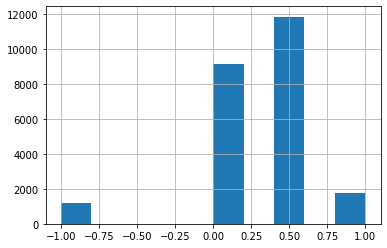

In [8]:
all_texts_comments.comment_grades.hist()  # 1 is good, -1 is bad, 0 is vague, 0.5 is no trigger words

In [ ]:
all_texts_comments.to_csv(f'{path}/VER1_all_comments_to_theories_with_scores.csv', index=False)

In [9]:
bad_read_comments = all_texts_comments[all_texts_comments.comment_grades == -1]
vague_read_comments = all_texts_comments[all_texts_comments.comment_grades == 0]
good_read_comments = all_texts_comments[all_texts_comments.comment_grades == 1]
no_triggers_comments = all_texts_comments[all_texts_comments.comment_grades == 0.5]

In [10]:
print(f'bad readability, {bad_read_comments.shape[0]}, \
      {round(bad_read_comments.shape[0]/all_texts_comments.shape[0], 2) * 100}%')
print(f'not clear readability, {vague_read_comments.shape[0]}, \
      {round(vague_read_comments.shape[0]/all_texts_comments.shape[0], 2) * 100}%')
print(f'good readability, {good_read_comments.shape[0]}, \
      {round(good_read_comments.shape[0]/all_texts_comments.shape[0], 2) * 100}%')
print(f'no triggers readability, {no_triggers_comments.shape[0]}, \
      {round(no_triggers_comments.shape[0]/all_texts_comments.shape[0], 2) * 100}%')

bad readability, 1172,       5.0%
not clear readability, 9129,       38.0%
good readability, 1738,       7.000000000000001%
no triggers readability, 11866,       50.0%


In [11]:
# let's look at the bad comments and vague comments
needed_columns = ['id', 'text', 'area', 'step_id', 'topic_id', 'count_bad', 'TextBlobPolarity', 'FlairPolarity']

bad_read_comments[needed_columns].to_csv(f'{path}/VER1_all_bad_comments.csv', index=False)
vague_read_comments[needed_columns].to_csv(f'{path}/VER1_all_vague_comments.csv', index=False)

## From comments' grades, get the division of topics into 'good' and 'bad' ones

In [12]:
all_texts_comments.columns

Index(['id', 'status', 'thread', 'text', 'time', 'content_link', 'block_name',
       'enabled', 'abuses', 'likes', 'replies', 'anon_user_id', 'area',
       'step_id', 'topic_id', 'lemmatized_comments', 'count_bad',
       'TextBlobPolarity', 'FlairPolarity', 'comment_grades'],
      dtype='object')

In [13]:
bad_read_comments_non_fixed = bad_read_comments.drop(bad_read_comments[bad_read_comments.status == 'fixed'].index)
bad_read_comments_non_fixed.shape[0]  # delete those that were fixed (55 were deleted)

1117

In [14]:
distinct_topics_general = set([el[1].topic_id for el in all_texts_comments.iterrows()])
distinct_topics_bad = set([el[1].topic_id for el in bad_read_comments_non_fixed.iterrows()])
distinct_topics_good = set([el[1].topic_id for el in good_read_comments.iterrows()])
distinct_topics_vague = set([el[1].topic_id for el in vague_read_comments.iterrows()])

print(f'overall topics: {len(distinct_topics_general)}')
print(f'bad topics: {len(distinct_topics_bad)}')
print(f'good topics: {len(distinct_topics_good)}')
print(f'not clear topics: {len(distinct_topics_vague)}')


overall topics: 1120
bad topics: 411
good topics: 510
not clear topics: 976


In [15]:
# there are intersections between 'bad' and 'good'
intersect_bad_good = distinct_topics_bad.intersection(distinct_topics_good)
len(intersect_bad_good)

264

In [16]:
# what if we take as 'bad' those that have >= 2 'bad' comments
# and as 'good' those that have >= 2 'good' comments 
# will there still be intersections?

In [ ]:
def count_good_and_bad_comments_per_each_topic(df):
    bad_comments_count_for_topics = dict()
    good_comments_count_for_topics = dict()

    for i, row in df.iterrows():
        status = row['status']
        comment_grade = row['comment_grades']
        topic_id = row['topic_id']

        # add the bad comments count
        if topic_id in bad_comments_count_for_topics:
            if comment_grade == -1 and status != 'fixed':
                bad_comments_count_for_topics[topic_id] += 1
            else:
                pass  # topic is in the dict but this comment is not bad so we don't change the count

        else:
            if comment_grade == -1 and status != 'fixed':
                bad_comments_count_for_topics[topic_id] = 1  # this is the first comment for topic and it's bad
            else:
                bad_comments_count_for_topics[topic_id] = 0  # this is the first comment for topic and it's not bad

        # now add the good comments count
        if topic_id in good_comments_count_for_topics:
            if comment_grade == 1:
                good_comments_count_for_topics[topic_id] += 1
            else:
                pass 
        else:
            if comment_grade == 1:
                good_comments_count_for_topics[topic_id] = 1  
            else:
                good_comments_count_for_topics[topic_id] = 0 
                
    return bad_comments_count_for_topics, good_comments_count_for_topics

In [17]:
bad_comments_count_for_topics, good_comments_count_for_topics = count_good_and_bad_comments_per_each_topic(all_texts_comments)

In [18]:
print('topics overall', len(bad_comments_count_for_topics))

bad_topic_ids = set([el for el in bad_comments_count_for_topics if bad_comments_count_for_topics[el] >= 2])
good_topic_ids = set([el for el in good_comments_count_for_topics if good_comments_count_for_topics[el] >= 2])
print('bad topics', len(bad_topic_ids))
print('good topics', len(good_topic_ids))

print()
inter = good_topic_ids.intersection(bad_topic_ids)
print('intersection', len(inter))
if len(inter) > 0:
    print([int(el) for el in inter])

topics overall 1120
bad topics 211
good topics 260

intersection 117
[2, 4, 5, 1033, 524, 12, 14, 15, 529, 20, 537, 25, 27, 28, 32, 38, 550, 40, 1074, 59, 577, 1093, 585, 1105, 87, 89, 90, 607, 608, 97, 624, 113, 625, 117, 1147, 124, 128, 652, 147, 148, 149, 1692, 673, 166, 167, 172, 173, 1724, 192, 193, 711, 712, 1230, 211, 724, 217, 218, 230, 751, 259, 260, 270, 273, 286, 1314, 1315, 812, 307, 309, 315, 317, 323, 333, 336, 849, 872, 362, 876, 391, 394, 395, 396, 397, 398, 399, 402, 403, 404, 405, 918, 408, 410, 412, 415, 417, 418, 429, 431, 432, 435, 438, 441, 443, 444, 448, 449, 452, 455, 466, 485, 486, 488, 491, 501, 502, 1015, 509]


In [19]:
# there are a lot of intersections still

In [20]:
# how many topics have only comments that contain no trigger words and therefore are neither good nor bad?
distinct_topics_no_triggers = set([el[1].topic_id for el in 
                                   all_texts_comments[all_texts_comments.comment_grades == 0.5].iterrows()])
distinct_topics_triggers = set([el[1].topic_id for el in 
                                all_texts_comments[all_texts_comments.comment_grades != 0.5].iterrows()])

res = distinct_topics_no_triggers - distinct_topics_triggers
print(len(res))  # these topics will be added to the 'good' part

94


What we'll do:

* topics that have >= THRESHOLD 'good' comments and no 'bad' comments: GOOD
* vice versa: BAD 
* topics that have no trigger words in comments: GOOD

As a result, many topics will end up in the 'vague' part but at least we'll be sure.

In [ ]:
def divide_into_good_vague_bad(bad_comments_count_for_topics, good_comments_count_for_topics, threshold):
    final_good_topics = []
    final_bad_topics = []
    final_vague_topics = []

    for topic_id in bad_comments_count_for_topics:
        bad_num = bad_comments_count_for_topics[topic_id]
        good_num = good_comments_count_for_topics[topic_id]

        if bad_num >= threshold and good_num == 0:
            final_bad_topics.append(topic_id)
        elif good_num >= threshold and bad_num == 0:
            final_good_topics.append(topic_id)
        else:
            final_vague_topics.append(topic_id)
            
    return final_good_topics, final_vague_topics, final_bad_topics

In [ ]:
final_good_topics, final_vague_topics, final_bad_topics = divide_into_good_vague_bad(bad_comments_count_for_topics, 
                                                                                     good_comments_count_for_topics, 
                                                                                     threshold=2)

In [22]:
print('good dataset', len(final_good_topics))
print('bad dataset', len(final_bad_topics))
print('vague dataset', len(final_vague_topics))

good dataset 86
bad dataset 52
vague dataset 982


In [23]:
final_good_topics, final_vague_topics, final_bad_topics = divide_into_good_vague_bad(bad_comments_count_for_topics, 
                                                                                     good_comments_count_for_topics, 
                                                                                     threshold=1)

In [24]:
print('good dataset', len(final_good_topics))
print('bad dataset', len(final_bad_topics))
print('vague dataset', len(final_vague_topics))

good dataset 246
bad dataset 147
vague dataset 727


In [25]:
df_with_features = pd.DataFrame({'topic_id': list([int(el) for el in final_good_topics]) + list([int(el) for el in final_bad_topics]), 
                                'target': [0] * len(final_good_topics) + [1] * len(final_bad_topics)})

## Extend the corpus by adding topics with high and low average like

In [26]:
file = '/home/anna/Documents/Diploma/topics_with_statistics/topics_3_months_with_statistics_and_scores.csv'

In [27]:
topic_statistics = pd.read_csv(file)

In [28]:
topic_statistics.head()

,step_id,is_theory,text,seconds_to_complete,last_3_month_completion_rate,last_3_month_avg_like,last_3_month_completed_step_users_count,last_3_month_likes_count,last_3_month_topic_completion_rate,last_3_month_completed_topic_users_count,back_to_theory_times_per_user_session_avg_last_3_month,back_to_theory_users_%_last_3_month,cleaned_texts,num_words,num_sentences,num_syllables,flesch_score,dale_chall_score
0,12357,1,"""<h5 id=\""introduction\""> Introduction</h5>\n\...",603.45,0.56,2.00,40.0,10.0,0.90,35.0,1.43,67.21,So far you have learned quite a lot about quer...,629,36,988,56.215480,8.946413
1,12691,1,"""<p>JavaScript was originally developed as a l...",253.21,0.87,1.72,884.0,79.0,0.96,844.0,0.34,24.43,JavaScript was originally developed as a langu...,602,41,946,58.988972,9.689308
2,8112,1,"""<p>We've already learned what annotations are...",486.94,0.45,1.57,50.0,7.0,0.89,49.0,1.00,69.41,We've already learned what annotations are and...,607,34,981,51.988400,8.918233
3,7892,1,"""<h5>Introduction</h5>\n\n<p>You often hear pe...",542.73,0.72,2.00,60.0,5.0,0.91,58.0,0.33,26.39,You often hear people speak about the probabil...,1123,59,1682,60.803928,9.501775
4,15809,1,"""<h5>Introduction</h5>\n\n<p>When you have alr...",556.76,0.43,1.40,43.0,10.0,0.91,53.0,0.93,50.88,When you have already learned the basics of pr...,631,29,985,52.688193,9.220007


<AxesSubplot:>

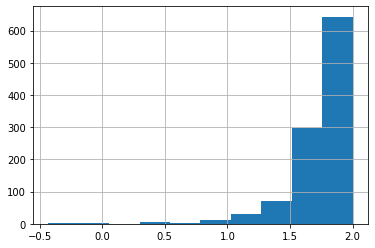

In [29]:
topic_statistics.last_3_month_avg_like.hist()

In [30]:
more_likes = topic_statistics[topic_statistics.last_3_month_likes_count > 20]
more_likes.shape[0]

591

In [31]:
very_good_topics = more_likes[more_likes.last_3_month_avg_like > 1.85]
very_bad_topics = more_likes[more_likes.last_3_month_avg_like < 0]

print(very_good_topics.shape[0], very_bad_topics.shape[0])  # there are no topics with very bad likes

128 0


#### Intersection between good likes and comments

In [32]:
# intersection between topics that are very good according to the av like and identified as good by our algorithm
good_like_steps = [row['step_id'] for i, row in very_good_topics.iterrows()]

In [33]:
import pickle
step_id_topic_id_mapping = pickle.load(open('step_id_topic_id_mapping.pkl', 'br'))

In [34]:
good_like_topics = set([step_id_topic_id_mapping[step_id] for step_id in good_like_steps])

In [35]:
print(len(good_like_topics.intersection(final_good_topics)))  # 39 are interescted, but 89 are new!

39


#### Intersection between good likes and BAD comments

In [36]:
# let's also check that the bad topics according to comments are not in good_like_topics
print(len(good_like_topics.intersection(final_bad_topics)))

# they are, it means that these 15 topics will now end up with both positive and negative label

15


In [37]:
# let's look at these topics
intersected_good_like_bad_comments = good_like_topics.intersection(final_bad_topics)

In [38]:
intersected_good_like_bad_comments

{434.0,
 530.0,
 555.0,
 557.0,
 634.0,
 662.0,
 706.0,
 853.0,
 949.0,
 985.0,
 1071.0,
 1125.0,
 1342.0,
 1600.0,
 1849.0}

In [39]:
topic_id_step_id_mapping = pickle.load(open('topic_id_step_id_mapping.pkl', 'br'))

In [40]:
step_ids = [topic_id_step_id_mapping[topic_id] for topic_id in intersected_good_like_bad_comments]
step_ids

[15412,
 8731,
 11834,
 7510,
 7400,
 11354,
 7139,
 6177,
 9544,
 8364,
 17197,
 10295,
 10570,
 8122,
 12886]

In [41]:
topic_statistics[topic_statistics.step_id == 15412]

,step_id,is_theory,text,seconds_to_complete,last_3_month_completion_rate,last_3_month_avg_like,last_3_month_completed_step_users_count,last_3_month_likes_count,last_3_month_topic_completion_rate,last_3_month_completed_topic_users_count,back_to_theory_times_per_user_session_avg_last_3_month,back_to_theory_users_%_last_3_month,cleaned_texts,num_words,num_sentences,num_syllables,flesch_score,dale_chall_score
938,15412,1,"""<p>Like in many other programming languages, ...",278.03,0.77,1.86,280.0,28.0,0.91,282.0,0.42,25.14,"Like in many other programming languages, stri...",403,19,580,63.549492,10.056358


In [42]:
all_texts_comments[all_texts_comments.step_id == 15412]

,id,status,thread,text,time,content_link,block_name,enabled,abuses,likes,replies,anon_user_id,area,step_id,topic_id,lemmatized_comments,count_bad,TextBlobPolarity,FlairPolarity,comment_grades
18243,1190852,new,comment,there's a statement at the end of section #1: ...,2021-10-25 20:25:43,https://hyperskill.org/learn/step/15412,text,1,0,0,1,18,golangᵝ,15412,1600.0,there be a statement at the end of section # 1...,1,-0.312500,-0.999510,-1.0
18249,1239394,new,comment,you can also get the length of the string by c...,2021-11-20 20:20:31,https://hyperskill.org/learn/step/15412,text,1,0,1,0,68,golangᵝ,15412,1600.0,you can also get the length of the string by c...,1,-0.500000,-0.999114,-1.0
18259,1271100,new,comment,Not exactly.\nWe want to say that the concaten...,2021-12-09 13:19:09,https://hyperskill.org/learn/step/15412,text,1,0,0,0,0,golangᵝ,15412,1600.0,not exactly . \n we want to say that the conca...,2,0.005682,-0.999065,0.0
18276,1302891,new,feedback,"""consits""",2021-12-28 17:37:20,https://hyperskill.org/learn/step/15412,text,1,0,0,0,127,golangᵝ,15412,1600.0,""" consit """,0,0.000000,0.956184,0.5


In [43]:
print(all_texts_comments[all_texts_comments.step_id == 15412].text.values)

['there\'s a statement at the end of section #1: \n"However, it still means that the string "hello" exists somewhere in memory, and Go will not change the contents of that memory location."\ndoes it mean that GoLang doesn\'t have any garbage collector?'
 'you can also get the length of the string by converting it to a rune slice and get its length:\nlen([]rune("some weird string"))'
 'Not exactly.\nWe want to say that the concatenation always creates a new string allocation because the string type is immutable in Go. Do you find the statement unclear?'
 '"consits"']


The comments here are not really negative even though they are identified as such. What can we do with this? 
Exclude from 'bad' topics those that have good likes, for example.

#### Compose the dataset

In [44]:
# delete from 'bad' those that received good like
final_bad_topics = set(final_bad_topics) - intersected_good_like_bad_comments

# add to 'good' those that received good like
expanded_good_topics = good_like_topics.union(final_good_topics)

In [45]:
print(len(final_bad_topics), len(expanded_good_topics))

132 335


In [46]:
df_with_features = pd.DataFrame({'topic_id': list([int(el) for el in expanded_good_topics]) + list([int(el) for el in final_bad_topics]), 
                                'target': [0] * len(expanded_good_topics) + [1] * len(final_bad_topics)})

In [47]:
path = './new_cleaned/train_corpus'
df_with_features.to_csv(f'{path}/topic_ids_with_target_features.csv', index=False)